# Tutorial xarray (MAV110)

## 2024-12-19
## Fabien Roquet

### Data extraction on the Copernicux Marine Server

In [1]:
import copernicusmarine

copernicusmarine.subset(
  dataset_id="cmems_mod_bal_phy_anfc_P1M-m",
  variables=["thetao"],
  minimum_longitude=9.041532516479492,
  maximum_longitude=30.208656311035156,
  minimum_latitude=53.00829315185547,
  maximum_latitude=65.89141845703125,
  start_datetime="2023-01-01T00:00:00",
  end_datetime="2023-12-01T00:00:00",
  minimum_depth=0.5016462206840515,
  maximum_depth=0.5016462206840515,
)

username:Abort


## Read the netCDF file

In [2]:
import xarray as xr
import cmocean
import matplotlib.pyplot as plt

In [3]:
namefile = 'cmems_mod_bal_phy_anfc_P1M-m_1734603684941.nc'

In [4]:
ds = xr.open_dataset(namefile)

In [5]:
ds

<xarray.Dataset> Size: 28MB
Dimensions:    (time: 12, depth: 1, latitude: 774, longitude: 763)
Coordinates:
  * time       (time) datetime64[ns] 96B 2023-01-01 2023-02-01 ... 2023-12-01
  * depth      (depth) float32 4B 0.5016
  * latitude   (latitude) float32 3kB 53.01 53.02 53.04 ... 65.86 65.87 65.89
  * longitude  (longitude) float32 3kB 9.042 9.069 9.097 ... 30.15 30.18 30.21
Data variables:
    thetao     (time, depth, latitude, longitude) float32 28MB ...
Attributes:
    Conventions:       CF-1.11
    title:             CMEMS NEMO monthly integrated model fields
    institution:       Baltic MFC, PU Swedish Meteorological and Hydrological...
    source:            CMEMS BAL MFC NEMO model output converted to NetCDF
    contact:           servicedesk.cmems@mercator-ocean.eu
    references:        https://marine.copernicus.eu/
    comment:           Data on cropped native product grid. Horizontal veloci...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  BALTICSEA_ANALYSISFORECAST_PHY_003_006
    subset:datasetId:  cmems_mod_bal_phy_anfc_P1M-m_202311
    subset:date:       2024-12-19T10:21:24.941Z

In [8]:
# remove dimensions with only one element (here, depth)
ds = ds.squeeze()
ds

<xarray.Dataset> Size: 28MB
Dimensions:    (time: 12, latitude: 774, longitude: 763)
Coordinates:
  * time       (time) datetime64[ns] 96B 2023-01-01 2023-02-01 ... 2023-12-01
    depth      float32 4B 0.5016
  * latitude   (latitude) float32 3kB 53.01 53.02 53.04 ... 65.86 65.87 65.89
  * longitude  (longitude) float32 3kB 9.042 9.069 9.097 ... 30.15 30.18 30.21
Data variables:
    thetao     (time, latitude, longitude) float32 28MB ...
Attributes:
    Conventions:       CF-1.11
    title:             CMEMS NEMO monthly integrated model fields
    institution:       Baltic MFC, PU Swedish Meteorological and Hydrological...
    source:            CMEMS BAL MFC NEMO model output converted to NetCDF
    contact:           servicedesk.cmems@mercator-ocean.eu
    references:        https://marine.copernicus.eu/
    comment:           Data on cropped native product grid. Horizontal veloci...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  BALTICSEA_ANALYSISFORECAST_PHY_003_006
    subset:datasetId:  cmems_mod_bal_phy_anfc_P1M-m_202311
    subset:date:       2024-12-19T10:21:24.941Z

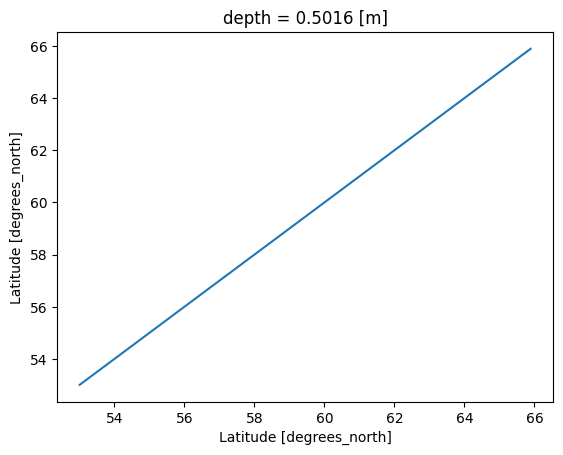

In [7]:
# read and plot a coordinate variable (one dimension)
ds.latitude.plot()

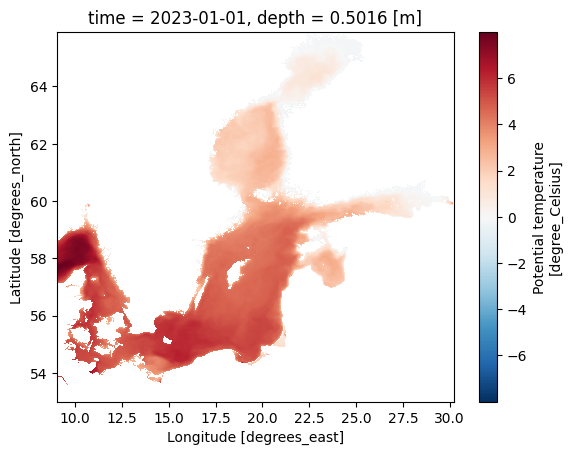

In [9]:
# read and plot a variable with two dimensions
ds.thetao.isel(time=0).plot()

## plot distribution in January 2023

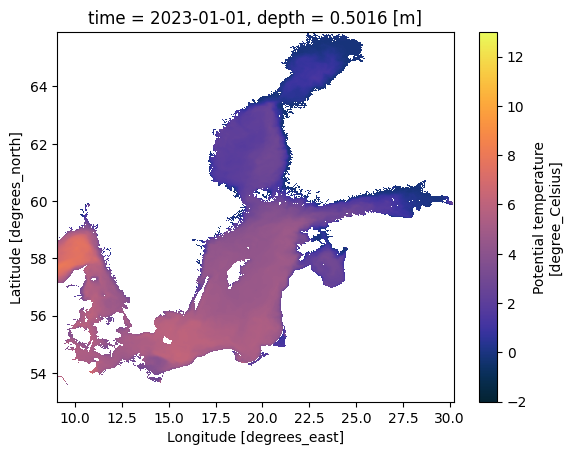

In [10]:
ds.thetao.isel(time=0).plot(cmap=cmocean.cm.thermal,vmin=-2,vmax=13)

## plot year-mean temperature in 2023

Text(0.5, 1.0, 'Mean sea surface temperature in 2023')

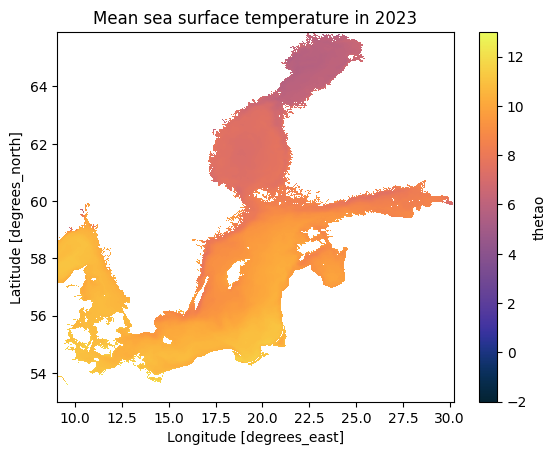

In [11]:
ds.thetao.mean(dim='time').plot(cmap=cmocean.cm.thermal,vmin=-2,vmax=13)
plt.title('Mean sea surface temperature in 2023')

## Temperature anomaly in Januray 2023 compared to annual mean

In [12]:
sst_january = ds.thetao.isel(time=0)
sst_mean    = ds.thetao.mean(dim='time')

In [13]:
sst_anomaly_january = sst_january - sst_mean

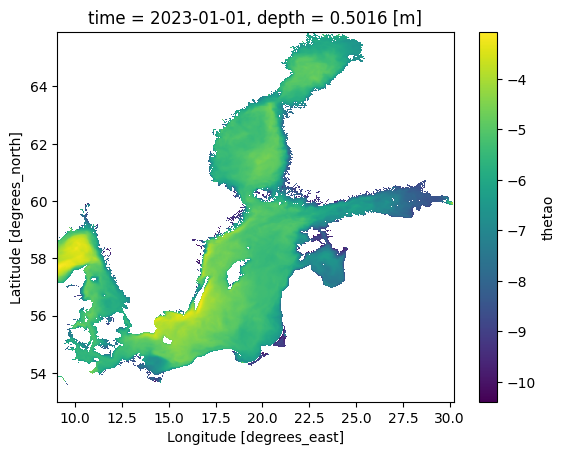

In [14]:
sst_anomaly_january.plot()

## plot several panels together

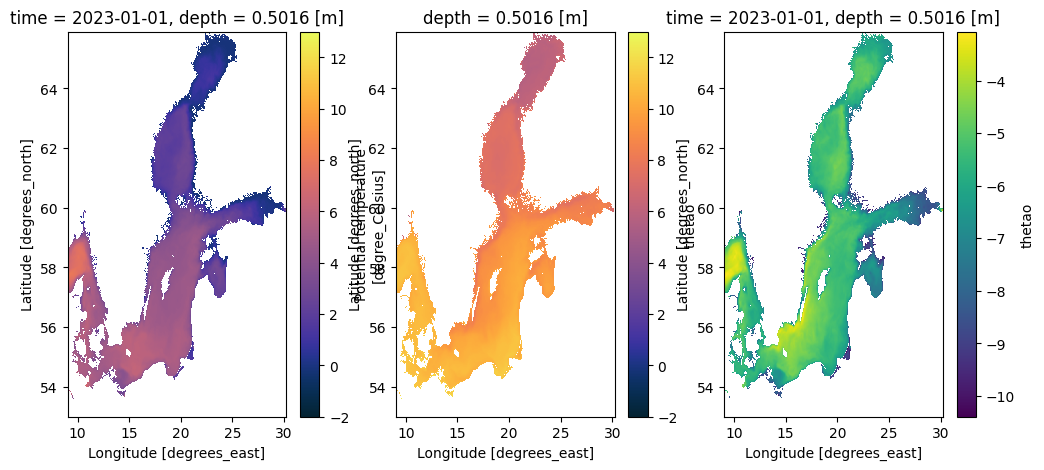

In [15]:
fig, ax = plt.subplots(1,3,figsize=(12,5))

ds.thetao.isel(time=0).plot(ax=ax[0],cmap=cmocean.cm.thermal,vmin=-2,vmax=13)
ds.thetao.mean(dim='time').plot(ax=ax[1],cmap=cmocean.cm.thermal,vmin=-2,vmax=13)
(ds.thetao.isel(time=0)-ds.thetao.mean(dim='time')).plot(ax=ax[2])



## time-series of mean temperature

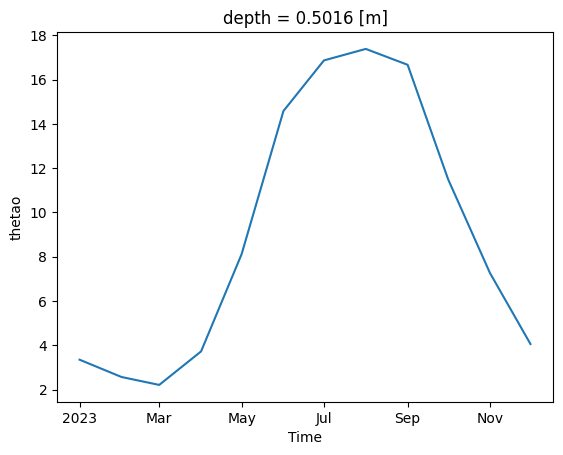

In [16]:
ds.thetao.mean(dim=['latitude','longitude']).plot()